In [1]:
from heapq import nlargest, nsmallest
import networkx as nx
import matplotlib.pyplot as plt

### Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges. 

**Dataset Loaded**: Gnutella peer-to-peer network, August 4 2002 https://snap.stanford.edu/data/p2p-Gnutella04.html

In [2]:
# Load as directed
fh_di = open("p2p-Gnutella04-sub.txt", "rb")
G_di = nx.read_edgelist(fh_di, nodetype=int, create_using=nx.DiGraph())

In [3]:
# Load as undirected
fh_un = open("p2p-Gnutella04-sub.txt", "rb")
G_un = nx.read_adjlist(fh_un)

### Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

#### Diameter

Diameter of undirected version.

In [4]:
nx.diameter(G_un)

9

Diameter of directed graph is deemed infinite, since it is not strongly connected. [Source](https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter)

In [5]:
try:
    nx.diameter(G_di)
except nx.NetworkXError:
    print("Graph not connected: infinite path length")

Graph not connected: infinite path length


#### Degree Centrality

Maximum degree centrality

In [6]:
max(nx.degree_centrality(G_di).values())

0.008602150537634409

The node with the maximum degree of centrality. [Source](https://pythonguides.com/python-dictionary-search-by-value/)

In [7]:
dict((new_val,new_k) for new_k,new_val in nx.degree_centrality(G_di).items()).get(.008602150537634409)

314

We can also see the 5 highest degrees of centrality

In [8]:
nlargest(5, nx.degree_centrality(G_di).values())

[0.008602150537634409,
 0.006758832565284178,
 0.006758832565284178,
 0.0064516129032258064,
 0.005529953917050691]

Minimum degree centrality

In [9]:
min(nx.degree_centrality(G_di).values())

0.00030721966205837174

The node with the minimum degree of centrality. [Source](https://pythonguides.com/python-dictionary-search-by-value/)

In [10]:
dict((new_val,new_k) for new_k,new_val in nx.degree_centrality(G_di).items()).get(0.00030721966205837174)

3073

We can also see the 5 lowest degrees of centrality

In [11]:
nsmallest(5, nx.degree_centrality(G_di).values())

[0.00030721966205837174,
 0.00030721966205837174,
 0.00030721966205837174,
 0.00030721966205837174,
 0.00030721966205837174]

#### Closeness Centrality

In [12]:
nlargest(5, nx.closeness_centrality(G_di).values())

[0.01788134440604199,
 0.01758827336903272,
 0.01736090330560377,
 0.017032324851399185,
 0.01693130640832835]

In [13]:
nsmallest(5, nx.closeness_centrality(G_di).values())

[0.0,
 0.00030721966205837174,
 0.00030721966205837174,
 0.00030721966205837174,
 0.00030721966205837174]

#### Betweenness Centrality

In [14]:
nlargest(5, nx.betweenness_centrality(G_di).values())

[0.020920125609926052,
 0.016108453902583204,
 0.015735745827182377,
 0.0154002369053182,
 0.014518749425351436]

In [15]:
nsmallest(5, nx.betweenness_centrality(G_di).values())

[0.0, 0.0, 0.0, 0.0, 0.0]

#### Eigenvector Centrality

In [16]:
nlargest(5, nx.eigenvector_centrality(G_di).values())

[0.10310391038890467,
 0.09740353745691646,
 0.09063516021022115,
 0.089320395478325,
 0.08507195842315012]

In [17]:
nsmallest(5, nx.eigenvector_centrality(G_di).values())

[4.0003076229356387e-22,
 1.7201322778623242e-20,
 1.7201322778623242e-20,
 1.7201322778623242e-20,
 1.7201322778623242e-20]

#### PageRank

In [18]:
nlargest(5, nx.pagerank(G_di).values())

[0.0007983320017612,
 0.0007767749956708479,
 0.0007306335126109578,
 0.0007291141274587601,
 0.0006560815740829615]

In [19]:
nsmallest(5, nx.pagerank(G_di).values())

[0.00025875888650782455,
 0.0002678680992642615,
 0.0002678680992642615,
 0.0002678680992642615,
 0.0002678680992642615]

#### Density

In [20]:
nx.density(G_di)

0.0004743222485157969

#### Various

In [21]:
nx.number_of_nodes(G_di)

3256

In [22]:
nx.number_of_edges(G_di)

5027

In [23]:
nx.is_directed(G_di)

True

### Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information. 

The plots indicate the network is somewhat of a "dreaded hairball".

#### Directed plot

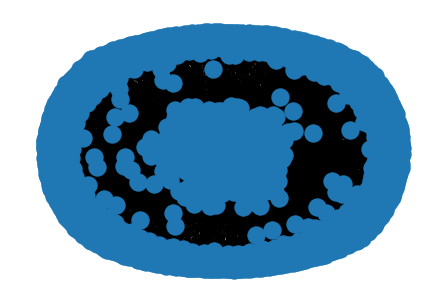

In [11]:
nx.draw(G_di)

#### Undirected plot

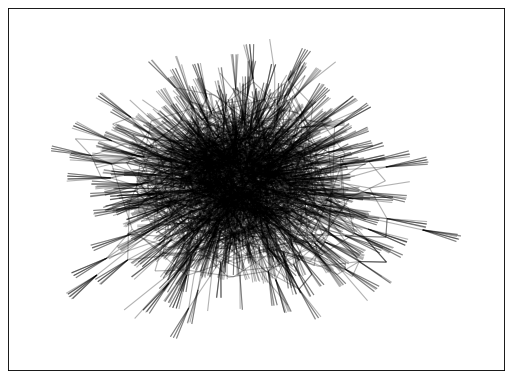

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx_edges(G_un, pos=nx.spring_layout(G_un), alpha=0.3)

#### Frequency of degree value

We can see most of the nodes have a low number of connections, but there are a few outliers (frequent sharers).

(array([26.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0. ,  191.5,  383. ,  574.5,  766. ,  957.5, 1149. , 1340.5,
        1532. , 1723.5, 1915. ]),
 <BarContainer object of 10 artists>)

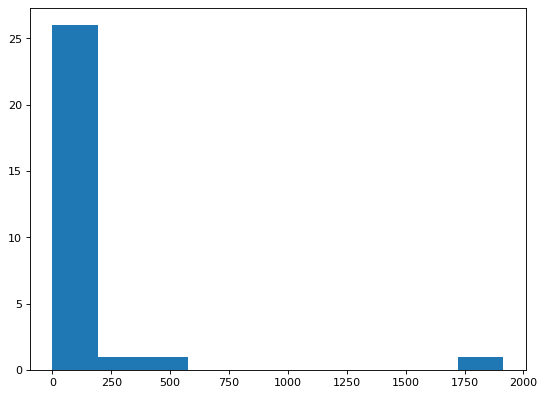

In [14]:
figure(figsize=(8, 6), dpi=80)
plt.hist(nx.degree_histogram(G_un))

#### Frequency of closeness centrality

(array([ 30., 275., 806., 849., 549., 330., 190., 151.,  66.,  10.]),
 array([0.14018692, 0.15056304, 0.16093916, 0.17131528, 0.1816914 ,
        0.19206753, 0.20244365, 0.21281977, 0.22319589, 0.23357202,
        0.24394814]),
 <BarContainer object of 10 artists>)

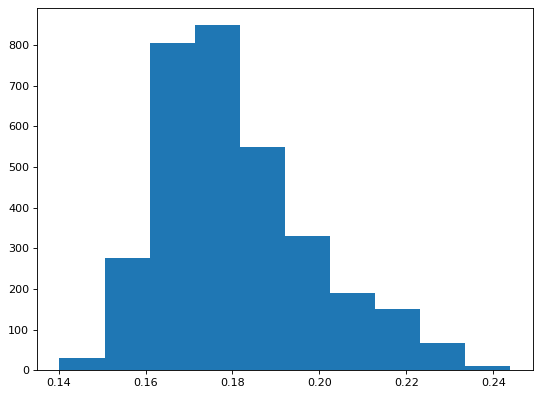

In [56]:
figure(figsize=(8, 6), dpi=80)
plt.hist(nx.closeness_centrality(G_un).values())

### References

*Social Network Analysis for Startups* by Maksim Tsvetovat, Alexander Kouznetsov <br> 
NetworkX Official Documentation: https://networkx.org/documentation/stable/index.html <br>
Python Dictionary Search by value: https://pythonguides.com/python-dictionary-search-by-value/ <br>
StackOverflow: https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter